In [1]:
import  logging

def configure_logger():
    root_logger = logging.getLogger()
    root_logger.setLevel(logging.INFO)
    handler = logging.StreamHandler()
    formatter = logging.Formatter(
        fmt='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
    handler.setFormatter(formatter)
    root_logger.addHandler(handler)

In [2]:
import os 

import numpy as np
import pandas as pd

In [3]:
!gsutil -m rsync -r gs://elvos/mip_data/ /home/amy/data/amy1

Building synchronization state...
Starting synchronization


In [4]:
!ls /home/amy/data/amy1/from_numpy

04IOS24JP70LHBGB_mip.npy  G06KIRHKXWJZV4JL_mip.npy  PQJEIXKIJMZTBZ74_mip.npy
0DQO9A6UXUQHR8RA_mip.npy  G37FBCOEGUZFY138_mip.npy  PQLRGWB8W5XDIP1B_mip.npy
0E1AN2T001WORM02_mip.npy  G7ZGNCQ8PR5NXN9Z_mip.npy  PVMXD3RZSHEQTYW3_mip.npy
0EZJW4R4EMC16I10_mip.npy  GB9QW6WTB9XYMMN4_mip.npy  PWECQP8X5J7H4F2Y_mip.npy
0KSBX96F8BU1FCFQ_mip.npy  GBA7XJ5E7ITWZW7K_mip.npy  PXUXRMI8Q4TOF3FK_mip.npy
0LT6HMDHUK63WSC7_mip.npy  GBXENHYLRVZ5DTHI_mip.npy  PYRDN2YA3MWCWKCC_mip.npy
0MG5EK1O64CPS887_mip.npy  GCBJDIT55TRGHZIR_mip.npy  PYZP7WQ4QRH46EFS_mip.npy
0MTDDGCF20DKOR59_mip.npy  GCSZPU5LPJII8FGU_mip.npy  Q0YMNAR31STBFPG6_mip.npy
0OJARUOGIFH5TZKU_mip.npy  GDYRQZ2185AOXLHC_mip.npy  Q2ZSL21Z90QTPXY5_mip.npy
0QPSB9IO98216B98_mip.npy  GET5PY3CH6RJV3UW_mip.npy  Q7TZ7D9MDFNNTUIE_mip.npy
0R1R98REO7SARJ06_mip.npy  GFFSQZ18XGOVEET0_mip.npy  Q8BNE59JIKQLLYJ1_mip.npy
0RB9KGMO90G1YQZD_mip.npy  GG1EJGK0NHRCBIBA_mip.npy  Q8LO6RYLTPQQKJO8_mip.npy
0YSFCN6QTA52Q013_mip.npy  GHD3U9CYRYQ4A0A0_mip.npy  Q9K5IEJR20DGZMSZ_mip.npy

In [5]:
!ls /home/amy/data/amy1/from_luke_training

04IOS24JP70LHBGB_mip.npy  GG1EJGK0NHRCBIBA_mip.npy  PMUAC5NYSRLNM8NZ_mip.npy
0E1AN2T001WORM02_mip.npy  GHD3U9CYRYQ4A0A0_mip.npy  PMUXVQHYYYBOK4RL_mip.npy
0KSBX96F8BU1FCFQ_mip.npy  GHNKISIFB2PFOZ8O_mip.npy  PNPGGIFOXWJJQ22P_mip.npy
0MG5EK1O64CPS887_mip.npy  GHVG2CNNRZ65UBEU_mip.npy  POYYSD3RSJFBKSLQ_mip.npy
0MTDDGCF20DKOR59_mip.npy  GIPUIOSNW2C34HIS_mip.npy  PQ918CDGQIFXXXN1_mip.npy
0OJARUOGIFH5TZKU_mip.npy  GJ35FZQ5DSP09A4L_mip.npy  PQLRGWB8W5XDIP1B_mip.npy
0R1R98REO7SARJ06_mip.npy  GJ5CHFO5E33QWWNW_mip.npy  PWECQP8X5J7H4F2Y_mip.npy
16TRHGYACZ8HYHUB_mip.npy  GKDV3FW4M56I3IKV_mip.npy  PYRDN2YA3MWCWKCC_mip.npy
1BBPJ3U25RYGSRSS_mip.npy  GORU15M7DI5O0W1I_mip.npy  Q2ZSL21Z90QTPXY5_mip.npy
1H37S4G2MIXMQ3QS_mip.npy  GWGPR9W0KUGO4G6M_mip.npy  Q7TZ7D9MDFNNTUIE_mip.npy
1IN3A0RW0UHOBHMA_mip.npy  GXR5YMJB3PZQNLAC_mip.npy  Q9K5IEJR20DGZMSZ_mip.npy
1SDZGHSOKOCXJ82G_mip.npy  H0JM6Z3R5563HTJM_mip.npy  QEMIBYDHSXNH2E6X_mip.npy
2018050120260258_mip.npy  H72HW588HYXAZTGI_mip.npy  QGEQ4IFSRIA3RBVB_mip.npy

In [6]:
LENGTH, WIDTH, HEIGHT = (120, 120, 50)

VALID_TRAINING_INDICES = []
VALID_VALIDATION_INDICES = []

def load_training_data() -> np.array:
    """Returns 4D matri x of training data
    Data is in the form (n_samples, 1, w, h). 
    Samples are sorted by patient ID"""
    arrays = []
    training_filenames = sorted(os.listdir(
        '/home/amy/data/amy1/from_luke_training/'))
    for i, filename in enumerate(training_filenames):
        arr = np.load('/home/amy/data/amy1/from_luke_training/' + filename)
        if arr.shape == (LENGTH, WIDTH):
            arrays.append(arr)
            VALID_TRAINING_INDICES.append(i)
        else:
            logging.info(
                f'training file {filename} has incorrect shape {arr.shape}')
    return np.stack(arrays)

def load_validation_data() -> np.array:
    """Returns 4D matri x of validation data
    Data is in the form (n_samples, 1, w, h). 
    Samples are sorted by patient ID"""
    
    arrays = []
    validation_filenames = sorted(os.listdir(
        '/home/amy/data/amy1/from_luke_validation/'))
    for i, filename in enumerate(validation_filenames):
        arr = np.load('/home/amy/data/amy1/from_luke_validation/' + filename)
        if arr.shape == (LENGTH, WIDTH):
            arrays.append(arr)
            VALID_VALIDATION_INDICES.append(i)
        else:
            logging.info(
                f'training file {filename} has incorrect shape {arr.shape}')
    return np.stack(arrays)

def load_labels() -> (np.array, np.array):
    training_df = pd.read_csv('/home/amy/data/amy1/training_labels.csv')
    validation_df = pd.read_csv('/home/amy/data/amy1/validation_labels.csv')
    training_labels = training_df.sort_values('patient_id')['label'].values
    validation_labels = validation_df.sort_values('patient_id')['label'].values
    return training_labels, validation_labels

In [7]:
VALID_TRAINING_INDICES = []
VALID_VALIDATION_INDICES = []

X_train = load_training_data()
X_valid = load_validation_data()
y_train, y_valid = load_labels()
y_train = y_train[VALID_TRAINING_INDICES]
y_valid = y_valid[VALID_VALIDATION_INDICES]

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

(500, 120, 120) (500,) (379, 120, 120) (379,)


In [8]:
#def  normalize (X: np.array, mean: float, std: float):
 #   return (X - mean) / std


In [9]:
def squash_height(X: np.array):
    return X.max(axis=3) 

In [10]:
#X_mean = X_train.mean()
#X_std = X_train.std()
X_max = np.amax(X_train)
X_min = np.amin(X_train)

print(X_max)

#for i in range(X_train.shape[-1]):
#    X_train[...,i] = (x-X_min)/(X_max-X_min)

#normalize
X_train = (X_train - X_min)/(X_max - X_min)
print(X_max)

print(X_train)
#X_valid = normalize(X_valid, X_mean, X_std)

270
270
[[[0.178125 0.24375  0.2      ... 0.       0.       0.      ]
  [0.23125  0.21875  0.228125 ... 0.       0.       0.      ]
  [0.253125 0.259375 0.334375 ... 0.       0.       0.      ]
  ...
  [0.75625  0.7      0.575    ... 0.       0.       0.      ]
  [0.65625  0.840625 0.846875 ... 0.       0.       0.      ]
  [0.85     0.971875 0.790625 ... 0.       0.       0.      ]]

 [[0.715625 0.696875 0.678125 ... 0.       0.       0.      ]
  [0.953125 0.759375 0.815625 ... 0.       0.       0.      ]
  [0.528125 0.778125 0.56875  ... 0.       0.       0.      ]
  ...
  [0.29375  0.315625 0.353125 ... 0.       0.       0.      ]
  [0.2      0.215625 0.275    ... 0.       0.       0.      ]
  [0.       0.       0.       ... 0.       0.       0.      ]]

 [[0.       0.       0.       ... 0.628125 0.85     0.91875 ]
  [0.       0.       0.       ... 0.753125 0.909375 0.51875 ]
  [0.       0.       0.       ... 0.878125 0.921875 0.971875]
  ...
  [0.       0.       0.       ... 0.    

# Data MIP

In [11]:
#X_train_squashed = squash_height(X_train)
#X_train = np.stack([X_train_squashed, X_train_squashed, X_train_squashed], axis=3)

#print(X_train.shape)
#X_valid_squashed = squash_height(X_valid)
#X_valid = np.stack([X_valid_squashed, X_valid_squashed, X_valid_squashed], axis=3)
#print(X_valid.shape)

#TO USE
X_train = np.stack([X_train, X_train, X_train], axis=3)
X_valid = np.stack([X_valid, X_valid, X_valid], axis=3)

# Data Augmentation

In [12]:
X_train_flipped = np.flip(X_train, 1)
#for i in X_train: 
 #   flipped = np.flip(i, 1)
 #   X_train = np.append(X_train, flipped)
print(X_train_flipped.shape)

(500, 120, 120, 3)


In [ ]:
import matplotlib.pyplot as plt

ROWS = 4
COLS = 5
OFFSET = 40
fig = plt.figure(figsize=(8, 8))
for i in range(20):
    ax = fig.add_subplot(ROWS, COLS, i + 1)
    ax.set_title(f'label: {y_train[i]}')
    plt.imshow(X_train_flipped[i + OFFSET])

In [14]:
#import scipy.ndimage as sc

#X_train_rotate = sc.rotate(X_train, 15, axes=(1, 2))
#X_train_rotate = X_train_rotate[:,0:160,0:160,:]
#print(X_train_rotate.shape)

In [15]:
#import matplotlib.pyplot as plt

#ROWS = 4
#COLS = 5
#OFFSET = 40
#fig = plt.figure(figsize=(8, 8))
#for i in range(20):
 #   ax = fig.add_subplot(ROWS, COLS, i + 1)
  #  ax.set_title(f'label: {y_train[i]}')
   # plt.imshow(X_train_rotate[i + OFFSET])

In [16]:
#augmented_X_train = np.concatenate([X_train, X_train_flipped, X_train_rotate], axis=0)
#augmented_y_train = np.concatenate([y_train, y_train, y_train], axis=0)
augmented_X_train = np.concatenate([X_train, X_train_flipped], axis=0)
augmented_y_train = np.concatenate([y_train, y_train], axis=0)

# Exploration

In [17]:
%matplotlib inline

In [18]:
print(X_train.shape, X_train.min(), X_train.max())

(500, 120, 120, 3) 0.0 1.0


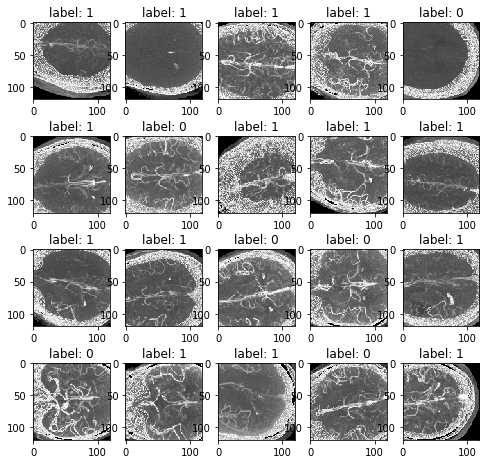

In [19]:
import matplotlib.pyplot as plt

ROWS = 4
COLS = 5
OFFSET = 40
fig = plt.figure(figsize=(8, 8))
for i in range(20):
    ax = fig.add_subplot(ROWS, COLS, i + 1)
    ax.set_title(f'label: {y_train[i]}')
    plt.imshow(X_train[i + OFFSET])

In [ ]:
ROWS = 4
COLS = 5
OFFSET = 60
fig = plt.figure(figsize=(8, 8))
for i in range(20):
    ax = fig.add_subplot(ROWS, COLS, i + 1)
    ax.set_title(f'label: {y_train[i]}')
    plt.imshow(X_train[i + OFFSET])

In [40]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D 
from keras.models import Model
from keras.optimizers import Adam

# expected input shape: (160, 160, 3)
base_model = applications.nasnet.NASNetMobile(input_shape=(120, 120, 3), include_top=False, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

In [41]:
# build a classifier model to put on top of the convolutional model
# This consists of a global average pooling layer and a fully connected layer with 256 nodes # Then apply dropout and sigmoid activation
model_top = Sequential()
model_top.add(GlobalAveragePooling2D(input_shape=base_model.output_shape[1:], data_format=None))
model_top.add(Dense(1024, activation='relu'))
model_top.add(Dropout(0.5))
model_top.add(Dense(1, activation='sigmoid'))
model = Model(inputs=base_model.input, outputs=model_top(base_model.output))
# Compile model using Adam optimizer with common values and binary cross entropy loss # Use low learning rate (lr) for transfer learning
model.compile(optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08,decay=0.0), loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 120, 120, 3)  0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 59, 59, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 59, 59, 32)   128         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_565 (Activation)     (None, 59, 59, 32)   0           stem_bn1[0][0]                   
__________________________________________________________________________________________________
reduction_

In [43]:
# epochs = number of passes of through training data # batch_size = number images processed at same time train_samples = 65

epochs = 20
batch_size = 80

In [44]:
# Fine-tune the pretrained Inception V3 model using the data generator 
# Specify steps per epoch (number of samples/batch_size)
history = model.fit(augmented_X_train, augmented_y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_valid, y_valid))

Train on 1000 samples, validate on 379 samples
Epoch 1/20
1000/1000 [==============================] - 86s 86ms/step - loss: 0.7668 - acc: 0.4980 - val_loss: 4.4710 - val_acc: 0.6016
Epoch 2/20
1000/1000 [==============================] - 5s 5ms/step - loss: 0.7017 - acc: 0.5590 - val_loss: 5.4156 - val_acc: 0.6148
Epoch 3/20
1000/1000 [==============================] - 5s 5ms/step - loss: 0.6939 - acc: 0.5760 - val_loss: 5.3166 - val_acc: 0.6148
Epoch 4/20
1000/1000 [==============================] - 5s 5ms/step - loss: 0.6667 - acc: 0.5750 - val_loss: 5.1927 - val_acc: 0.6148
Epoch 5/20
1000/1000 [==============================] - 5s 5ms/step - loss: 0.6710 - acc: 0.5960 - val_loss: 5.0174 - val_acc: 0.6201
Epoch 6/20
1000/1000 [==============================] - 5s 5ms/step - loss: 0.6482 - acc: 0.5910 - val_loss: 5.2892 - val_acc: 0.6148
Epoch 7/20
1000/1000 [==============================] - 5s 5ms/step - loss: 0.6336 - acc: 0.6380 - val_loss: 5.3123 - val_acc: 0.6201
Epoch 8/20
10

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


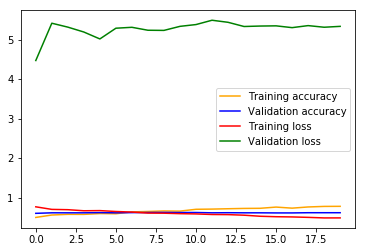

In [45]:
# import matplotlib library, and plot training cuve
import matplotlib.pyplot as plt 
print(history.history.keys())
plt.figure()
plt.plot(history.history['acc'], 'orange', label='Training accuracy') 
plt.plot(history.history['val_acc'], 'blue', label='Validation accuracy') 
plt.plot(history.history['loss'], 'red', label='Training loss') 
plt.plot(history.history['val_loss'], 'green', label='Validation loss') 
plt.legend()
plt.show()

In [ ]:
model.save('model-inception-06-12-18')